In [2]:
cd /content/drive/MyDrive/ibm guna/assgnment-3

/content/drive/MyDrive/ibm guna/assgnment-3


In [28]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
flowers_datagen = ImageDataGenerator(rescale= 1./225,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [32]:
flowers_datagen = ImageDataGenerator(rescale = 1./255)

In [33]:
a_flowers = flowers_datagen.flow_from_directory(r"/content/drive/MyDrive/ibm guna/assgnment-3",target_size=(256, 256),
                                                class_mode='categorical', batch_size=32)

Found 4317 images belonging to 1 classes.


Creat Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [35]:
model = Sequential()

In [36]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (256,256,3)))

In [37]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [38]:
model.add(Flatten())

In [39]:
model.add(Dense(300, activation = "relu"))

In [40]:
model.add(Dense(300, activation = "relu"))

In [41]:
model.add(Dense(5,activation="softmax"))

In [42]:
model.compile(loss = "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [43]:
len(a_flowers)

135

In [44]:
model.fit(a_flowers, epochs= 3,validation_data=a_flowers, steps_per_epoch=len(a_flowers),validation_steps=len(a_flowers) )

Epoch 1/3
135/135 [==============================] - 482s 4s/step - loss: 189515.8906 - accuracy: 0.2550 - val_loss: 528038.3750 - val_accuracy: 0.0000e+00
Epoch 2/3
135/135 [==============================] - 420s 3s/step - loss: 10653021.0000 - accuracy: 0.2001 - val_loss: 25478282.0000 - val_accuracy: 1.0000
Epoch 3/3
135/135 [==============================] - 431s 3s/step - loss: 64612228.0000 - accuracy: 0.2150 - val_loss: 141544160.0000 - val_accuracy: 0.0000e+00


In [45]:
model.save("flowers.h5")

In [46]:
#Testing the Model

In [47]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [49]:
model = load_model("/content/drive/MyDrive/ibm guna/assgnment-3/flowers.h5/")

In [51]:
img = image.load_img("//content/drive/MyDrive/ibm guna/assgnment-3/flowers/rose/102501987_3cdb8e5394_n.jpg",target_size=(256,256))

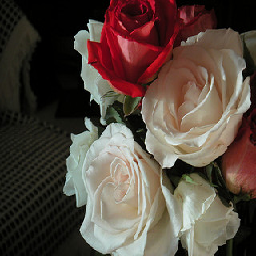

In [52]:
img

In [53]:
x = image.img_to_array(img)

In [54]:
x

array([[[15., 16., 10.],
        [21., 22., 17.],
        [ 6.,  6.,  4.],
        ...,
        [ 2.,  2.,  0.],
        [ 2.,  2.,  0.],
        [ 1.,  1.,  0.]],

       [[20., 21., 15.],
        [13., 14.,  9.],
        [ 4.,  4.,  2.],
        ...,
        [ 2.,  2.,  0.],
        [ 2.,  2.,  0.],
        [ 2.,  2.,  0.]],

       [[21., 22., 16.],
        [11., 12.,  7.],
        [ 3.,  3.,  1.],
        ...,
        [ 2.,  2.,  0.],
        [ 2.,  2.,  0.],
        [ 2.,  2.,  0.]],

       ...,

       [[ 2.,  2.,  0.],
        [ 0.,  0.,  0.],
        [ 6.,  6.,  4.],
        ...,
        [ 1.,  1.,  0.],
        [ 2.,  2.,  0.],
        [ 2.,  2.,  0.]],

       [[ 3.,  3.,  1.],
        [ 2.,  2.,  0.],
        [ 7.,  7.,  5.],
        ...,
        [ 1.,  1.,  0.],
        [ 2.,  2.,  0.],
        [ 2.,  2.,  0.]],

       [[ 5.,  5.,  3.],
        [ 5.,  5.,  3.],
        [ 9.,  9.,  7.],
        ...,
        [ 2.,  2.,  0.],
        [ 3.,  3.,  1.],
        [ 3.,  3.,  1.]]

In [55]:
x.ndim

3

In [56]:
x = np.expand_dims(x,axis= 0)

In [57]:
x.ndim

4

In [58]:
pred = model.predict(x)

In [59]:
pred

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [60]:
hi = ["daisy","dandelion","rose","sunflower","tulip"]

In [61]:
np.argmax(pred)

3

In [62]:
hi[np.argmax(pred)]

'sunflower'